In [4]:
import cv2
import os
from keras.models import load_model
import numpy as np
from pygame import mixer
import time

pygame 2.6.0 (SDL 2.28.4, Python 3.10.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [5]:
mixer.init()
sound = mixer.Sound('alarm.wav')

In [6]:
face = cv2.CascadeClassifier(r"C:\Users\Nitesh\Desktop\MINOR PROJECTS\MInor project 5\Drowsiness detection\haar cascade files\haarcascade_frontalface_alt.xml")
leye = cv2.CascadeClassifier(r"C:\Users\Nitesh\Desktop\MINOR PROJECTS\MInor project 5\Drowsiness detection\haar cascade files\haarcascade_lefteye_2splits.xml")
reye = cv2.CascadeClassifier(r"C:\Users\Nitesh\Desktop\MINOR PROJECTS\MInor project 5\Drowsiness detection\haar cascade files\haarcascade_righteye_2splits.xml")


In [7]:
lbl=['Close','Open']

In [8]:
model = load_model(r"C:\Users\Nitesh\Desktop\MINOR PROJECTS\MInor project 5\Drowsiness detection\models\cnnCat2.h5")
path = os.getcwd()
cap = cv2.VideoCapture(1)
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
count=0
score=0
thicc=2
rpred=[99]
lpred=[99]

pygame 2.6.0 (SDL 2.28.4, Python 3.10.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


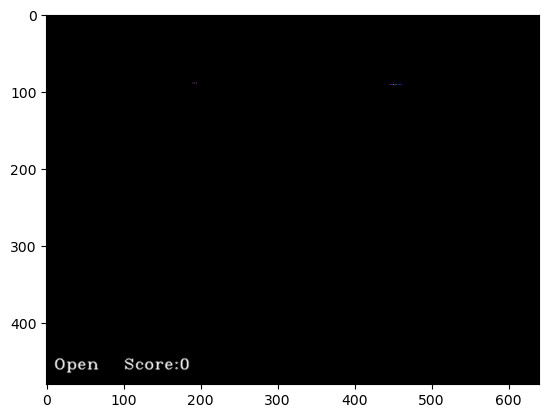

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1367: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [1]:
import cv2
import os
from keras.models import load_model
import numpy as np
from pygame import mixer
import matplotlib.pyplot as plt

# Initialize pygame mixer
mixer.init()
sound = mixer.Sound('alarm.wav')

# Load the Haar cascades for face and eyes detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
leye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_lefteye_2splits.xml')
reye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_righteye_2splits.xml')

# Load the model
model_path = r"C:\Users\Nitesh\Desktop\MINOR PROJECTS\MInor project 5\Drowsiness detection\models\cnnCat2.h5"
model = load_model(model_path)

# Start video capture
cap = cv2.VideoCapture(1)  # Try changing the index to 1 if 0 doesn't work
if not cap.isOpened():
    print("Error: Could not open video capture")
    exit()

path = os.getcwd()
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
count = 0
score = 0
thicc = 2
rpred = [99]
lpred = [99]

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture image")
            break

        height, width = frame.shape[:2]
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        faces = face_cascade.detectMultiScale(gray, minNeighbors=5, scaleFactor=1.1, minSize=(25, 25))
        left_eye = leye_cascade.detectMultiScale(gray)
        right_eye = reye_cascade.detectMultiScale(gray)

        cv2.rectangle(frame, (0, height - 50), (200, height), (0, 0, 0), thickness=cv2.FILLED)

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (100, 100, 100), 1)

        for (x, y, w, h) in right_eye:
            r_eye = frame[y:y + h, x:x + w]
            count += 1
            r_eye = cv2.cvtColor(r_eye, cv2.COLOR_BGR2GRAY)
            r_eye = cv2.resize(r_eye, (24, 24))
            r_eye = r_eye / 255
            r_eye = r_eye.reshape(24, 24, -1)
            r_eye = np.expand_dims(r_eye, axis=0)
            rpred = model.predict(r_eye)
            rpred = np.argmax(rpred, axis=1)
            if rpred[0] == 1:
                lbl = 'Open'
            if rpred[0] == 0:
                lbl = 'Closed'
            break

        for (x, y, w, h) in left_eye:
            l_eye = frame[y:y + h, x:x + w]
            count += 1
            l_eye = cv2.cvtColor(l_eye, cv2.COLOR_BGR2GRAY)
            l_eye = cv2.resize(l_eye, (24, 24))
            l_eye = l_eye / 255
            l_eye = l_eye.reshape(24, 24, -1)
            l_eye = np.expand_dims(l_eye, axis=0)
            lpred = model.predict(l_eye)
            lpred = np.argmax(lpred, axis=1)
            if lpred[0] == 1:
                lbl = 'Open'
            if lpred[0] == 0:
                lbl = 'Closed'
            break

        if rpred[0] == 0 and lpred[0] == 0:
            score += 1
            cv2.putText(frame, "Closed", (10, height - 20), font, 1, (255, 255, 255), 1, cv2.LINE_AA)
        else:
            score -= 1
            cv2.putText(frame, "Open", (10, height - 20), font, 1, (255, 255, 255), 1, cv2.LINE_AA)

        if score < 0:
            score = 0
        cv2.putText(frame, 'Score:' + str(score), (100, height - 20), font, 1, (255, 255, 255), 1, cv2.LINE_AA)
        if score > 15:
            # Person is feeling sleepy so we beep the alarm
            cv2.imwrite(os.path.join(path, 'image.jpg'), frame)
            try:
                sound.play()
            except:  # isplaying = False
                pass
            if thicc < 16:
                thicc += 2
            else:
                thicc -= 2
                if thicc < 2:
                    thicc = 2
            cv2.rectangle(frame, (0, 0), (width, height), (0, 0, 255), thicc)

        # Display frame using matplotlib
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.show()
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

except KeyboardInterrupt:
    print("Keyboard Interrupt: Exiting gracefully")

# Release the capture
cap.release()

# Clean up pygame mixer resources
mixer.quit()


In [ ]:
!pip uninstall opencv-python

In [ ]:
!pip install opencv-python

In [3]:
import cv2

# Open a connection to the webcam (0 is usually the default camera, change to 1 if you have multiple cameras)
cap = cv2.VideoCapture(1)  # Change to 1 if 0 doesn't work

# Check if the webcam is opened correctly
if not cap.isOpened():
    print("Error: Could not open video capture")
    exit()

frame_count = 0  # Counter for the frames captured
max_frames = 10  # Maximum number of frames to capture

while frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture image")
        break
    
    frame_count += 1
    # Construct a filename to save the frame (you can modify this as needed)
    filename = f"frame_{frame_count}.jpg"
    
    # Save the frame as an image
    cv2.imwrite(filename, frame)
    print(f"Saved {filename}")

# Release the capture
cap.release()

# Print a message indicating completion
print(f"Captured {frame_count} frames.")

# Display the filenames of captured frames on the console
for i in range(1, frame_count + 1):
    print(f"Frame {i}: frame_{i}.jpg")


Saved frame_1.jpg
Saved frame_2.jpg
Saved frame_3.jpg
Saved frame_4.jpg
Saved frame_5.jpg
Saved frame_6.jpg
Saved frame_7.jpg
Saved frame_8.jpg
Saved frame_9.jpg
Saved frame_10.jpg
Captured 10 frames.
Frame 1: frame_1.jpg
Frame 2: frame_2.jpg
Frame 3: frame_3.jpg
Frame 4: frame_4.jpg
Frame 5: frame_5.jpg
Frame 6: frame_6.jpg
Frame 7: frame_7.jpg
Frame 8: frame_8.jpg
Frame 9: frame_9.jpg
Frame 10: frame_10.jpg
